# Задача

Реализуйте класс для модели LeNet-5

Создайте экземпляр нейросети и примените его к нескольким примерам из MNIST.

Убедитесь, что сеть выдает случайные классы, т.к. веса были проинициализированы случайно.

***
***

# Решение

## Архитектура сети

<img src="https://blog.paperspace.com/content/images/2021/10/image-17.png" alt="LeNet-5" width="800"/>

<div class="cell border-box-sizing text_cell rendered"><div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="Details-of-the-architecture"><strong>Details of the architecture</strong><a class="anchor-link" href="#Details-of-the-architecture"><i class="fas fa-link fa-xs"></i></a></h3><p>Note : In the following, convolutional layers are labeled as Cx, subsampling layers are labeled as Sx, and fully connected
layers are labeled as Fx, where x is the layer index.</p>
<ul>
<li>Convolutional part:</li>
</ul>
<table>
<thead><tr>
<th>Layer</th>
<th style="text-align:center">Name</th>
<th style="text-align:center">Input channels</th>
<th style="text-align:center">Output channels (number of kernels)</th>
<th style="text-align:center">Kernel size</th>
<th style="text-align:center">stride</th>
</tr>
</thead>
<tbody>
<tr>
<td>Convolution</td>
<td style="text-align:center">C1</td>
<td style="text-align:center">1</td>
<td style="text-align:center">6</td>
<td style="text-align:center">5x5</td>
<td style="text-align:center">1</td>
</tr>
<tr>
<td>tanh</td>
<td style="text-align:center"></td>
<td style="text-align:center">6</td>
<td style="text-align:center">6</td>
<td style="text-align:center"></td>
<td style="text-align:center"></td>
</tr>
<tr>
<td>AvgPooling</td>
<td style="text-align:center">S2</td>
<td style="text-align:center">6</td>
<td style="text-align:center">6</td>
<td style="text-align:center">2x2</td>
<td style="text-align:center">2</td>
</tr>
<tr>
<td>Convolution</td>
<td style="text-align:center">C3</td>
<td style="text-align:center">6</td>
<td style="text-align:center">16</td>
<td style="text-align:center">5x5</td>
<td style="text-align:center">1</td>
</tr>
<tr>
<td>tanh</td>
<td style="text-align:center"></td>
<td style="text-align:center">16</td>
<td style="text-align:center">16</td>
<td style="text-align:center"></td>
<td style="text-align:center"></td>
</tr>
<tr>
<td>AvgPooling</td>
<td style="text-align:center">S4</td>
<td style="text-align:center">16</td>
<td style="text-align:center">16</td>
<td style="text-align:center">2x2</td>
<td style="text-align:center">2</td>
</tr>
<tr>
<td>Convolution</td>
<td style="text-align:center">C5</td>
<td style="text-align:center">6</td>
<td style="text-align:center">120</td>
<td style="text-align:center">5x5</td>
<td style="text-align:center">1</td>
</tr>
<tr>
<td>tanh</td>
<td style="text-align:center"></td>
<td style="text-align:center">120</td>
<td style="text-align:center">120</td>
<td style="text-align:center"></td>
</tr>
</tbody>
</table>
<ul>
<li>Fully Connected part:</li>
</ul>
<table>
<thead><tr>
<th>Layer</th>
<th style="text-align:center">Name</th>
<th style="text-align:center">Input size</th>
<th style="text-align:center">Output size</th>
</tr>
</thead>
<tbody>
<tr>
<td>Linear</td>
<td style="text-align:center">F5</td>
<td style="text-align:center">120</td>
<td style="text-align:center">84</td>
</tr>
<tr>
<td>tanh</td>
<td style="text-align:center"></td>
<td style="text-align:center"></td>
<td style="text-align:center"></td>
</tr>
<tr>
<td>Linear</td>
<td style="text-align:center">F6</td>
<td style="text-align:center">84</td>
<td style="text-align:center">10</td>
</tr>
<tr>
<td>LogSoftmax</td>
<td style="text-align:center"></td>
<td style="text-align:center"></td>
<td style="text-align:center"></td>
</tr>
</tbody>
</table>


## Импорт необходимых библиотек

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

torch.set_printoptions(precision=3)

import sys
import colorama # выделение цветом текста в выводной ячейке
from collections import OrderedDict
import matplotlib.pyplot as plt 

## Знакомимся с датасетом

In [3]:
# задаем необходимые трансформации
transformations = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor()
])

# определяем тренировочную выборку
train_data = datasets.MNIST('./data', 
                            train = True, 
                            download = True,
                            transform = transformations)

# определяем тестовую выборку
test_data = datasets.MNIST('./data', 
                            train = False, 
                            download = True,
                            transform = transformations)

# задаем тренировочный и тестовый даталоадеры
train_loader = torch.utils.data.DataLoader(train_data, batch_size=256, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1024, shuffle=False)

100%|██████████| 9912422/9912422 [00:01<00:00, 6746664.25it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 18974889.38it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 6236763.93it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14836860.41it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



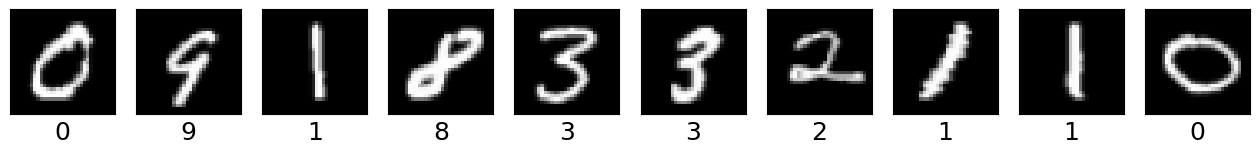

In [4]:
# ознакомимся с тренировочным датасетом
plt.figure(figsize=(16,9))
data, target = next(iter(train_loader))
for i in range(10):
    img = data.squeeze(1)[i]
    plt.subplot(1, 10, i+1)
    plt.imshow(img, cmap="gray", interpolation="none")
    plt.xlabel(target[i].item(), fontsize=18)
    plt.xticks([])
    plt.yticks([])

## Создаем архитектуру модели

In [5]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        self.conv_net = nn.Sequential(OrderedDict([               
            ('C1', nn.Conv2d(1, 6, kernel_size=(5, 5))),
            ('Tanh1', nn.Tanh()),
            
            ('S2', nn.AvgPool2d(kernel_size=(2, 2), stride=2)),
            ('C3', nn.Conv2d(6, 16, kernel_size=(5, 5))),
            ('Tanh3', nn.Tanh()),
            
            ('S4', nn.AvgPool2d(kernel_size=(2, 2), stride=2)),
            ('C5', nn.Conv2d(16, 120, kernel_size=(5, 5))),
            ('Tanh5', nn.Tanh()),
        ]))
        
        self.fully_connected = nn.Sequential(OrderedDict([
            ('F6', nn.Linear(120, 84)),
            ('Tanh6', nn.Tanh()),
            ('F7', nn.Linear(84, 10)),
            ('LogSoftmax', nn.LogSoftmax(dim=-1))
        ]))


    def forward(self, imgs):
        output = self.conv_net(imgs)
        output = output.view(imgs.shape[0], -1)  # imgs.shape[0]это размер батча
        output = self.fully_connected(output)
        return output     

In [6]:
# создаем нашу сеть и выводим ее архитектуру
conv_net = LeNet5()
print(conv_net)

LeNet5(
  (conv_net): Sequential(
    (C1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (Tanh1): Tanh()
    (S2): AvgPool2d(kernel_size=(2, 2), stride=2, padding=0)
    (C3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (Tanh3): Tanh()
    (S4): AvgPool2d(kernel_size=(2, 2), stride=2, padding=0)
    (C5): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (Tanh5): Tanh()
  )
  (fully_connected): Sequential(
    (F6): Linear(in_features=120, out_features=84, bias=True)
    (Tanh6): Tanh()
    (F7): Linear(in_features=84, out_features=10, bias=True)
    (LogSoftmax): LogSoftmax(dim=-1)
  )
)


## Визуализируем предсказания 
(сеть еще не обучена и веса инициализированы случайно)

Зададим функцию для визуализации предсказаний

In [7]:
def visualize_predictions(model, dataloader, device):
    '''
    Функция принимает на вход модель, даталоадер и устройство,
    на котором будет работать модель, возвращает изображения и 
    классы этих изображений
    '''
    # получаем изображение и метку класса из даталоадера
    data, labels = next(iter(dataloader))
    # переносим первые 10 изображений на указанное устройство (GPU), выделяем метки этих изображений
    data, labels = data[:10].to(device), labels[:10]
    # делаем предсказание
    predictions = model(data).max(1)[1]
    
    # переносим предсказания и изображения на устройство (в данном случае CPU)
    predictions, data = predictions.cpu(), data.cpu()
    
    # выводим изображения и их классы
    plt.figure(figsize=(16,9))
    for i in range(10):
        img = data.squeeze(1)[i]
        plt.subplot(1, 10, i+1)
        plt.imshow(img, cmap="gray", interpolation="none")
        plt.xlabel(predictions[i].item(), fontsize=18)
        plt.xticks([])
        plt.yticks([])      

In [8]:
# определим устройство для работы модели и перенесем туда модель
device = torch.device('mps') # GPU-ядра MacBook m1 pro
conv_net = conv_net.to(device)

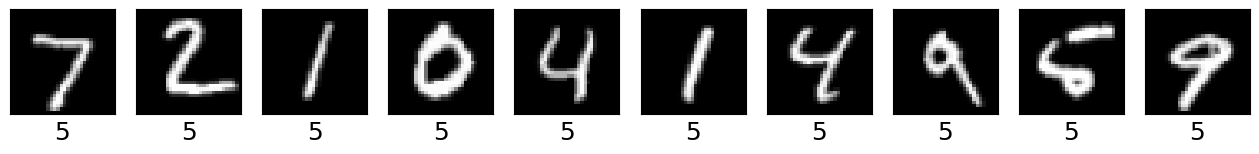

In [9]:
# визуализируем предсказания модели для 10 изображений
visualize_predictions(conv_net, test_loader, device)

**Вывод:** модель не прошла обучение, поэтому не выдает правильные предсказания

## Функции для обучения сети

In [10]:
def train_cnn(model, train_loader, test_loader, device, num_epochs=3, lr=0.1):

    """ Обучаем LeNet-5 
    Функция принимает на вход модель, тренировочный и тестовый даталоадеры, устройство на 
    котором будет проходить обучение, кол-во эпох и темп обучения.
    Функция проводит обучение модели с рассчетом accuracy в конце каждой эпохи, выводя
    эти данные для ознакомления.
    """

    # задаем оптимайзер и функцию потерь
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = torch.nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        print("=" * 30, "Starting epoch %d" % (epoch + 1), "=" * 30)
      
        model.train()  # Not necessary in our example, but still good practice.
                       # Only models with nn.Dropout and nn.BatchNorm modules require it
              
        # dataloader возвращает батчи с изображениями в 'data' и тензор с их соответствующими метками в 'labels'
        for batch_idx, (data, labels) in enumerate(train_loader):
            data, labels = data.to(device), labels.to(device)

            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
          
            if batch_idx % 40 == 0:
                print("Batch %d/%d, Loss=%.4f" % (batch_idx, len(train_loader), loss.item()))
      
        # рассчитываем accuracy на train и test в конце каждой эпохи
        train_acc = accuracy(model, train_loader, device)
        test_acc = accuracy(model, test_loader, device)
      
        print(colorama.Fore.GREEN, "\nAccuracy on training: %.2f%%" % (100*train_acc))
        print("Accuracy on test: %.2f%%" % (100*test_acc), colorama.Fore.RESET)

In [11]:
def accuracy(model, dataloader, device):
    """ 
    Функция принимает на вход модель, даталоадер и устройство на котором будет обучаться
    модель.
    Функция вычисляет точность модели на данных, предоставленных dataloader'ом.
    """
    model.eval()
    
    num_correct = 0
    num_samples = 0
    with torch.no_grad():  # deactivates autograd, reduces memory usage and speeds up computations
        for data, labels in dataloader:
            data, labels = data.to(device), labels.to(device)

            predictions = model(data).max(1)[1]  # индексы максимумов вдоль второго измерения
            num_correct += (predictions == labels).sum().item()
            num_samples += predictions.shape[0]
        
    return num_correct / num_samples

## Обучаем модель

In [12]:
train_cnn(conv_net, train_loader, test_loader, device, num_epochs=10, lr=2e-3)

============================== Starting epoch 1 ==============================
Batch 0/235, Loss=2.2999
Batch 40/235, Loss=0.4926
Batch 80/235, Loss=0.2461
Batch 120/235, Loss=0.2395
Batch 160/235, Loss=0.1443
Batch 200/235, Loss=0.2560
 
Accuracy on training: 96.04%
Accuracy on test: 95.94% 
============================== Starting epoch 2 ==============================
Batch 0/235, Loss=0.1158
Batch 40/235, Loss=0.1292
Batch 80/235, Loss=0.1229
Batch 120/235, Loss=0.1035
Batch 160/235, Loss=0.1512
Batch 200/235, Loss=0.1338
 
Accuracy on training: 97.46%
Accuracy on test: 97.06% 
============================== Starting epoch 3 ==============================
Batch 0/235, Loss=0.1240
Batch 40/235, Loss=0.1141
Batch 80/235, Loss=0.0517
Batch 120/235, Loss=0.1364
Batch 160/235, Loss=0.0476
Batch 200/235, Loss=0.0451
 
Accuracy on training: 98.42%
Accuracy on test: 97.95% 
============================== Starting epoch 4 ==============================
Batch 0/235, Loss=0.0472
Batch 40/235, 

## Визуализируем предсказания

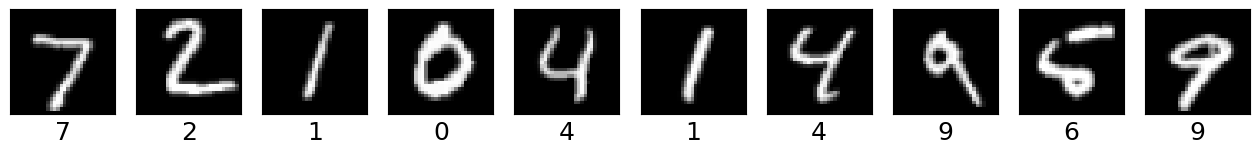

In [13]:
visualize_predictions(conv_net, test_loader, device)

**Выводы:**
- произведено обучение модели LeNet-5 на 10 эпохах
- *acccuracy* на тренировочной выборке достигли 99.60%, на тестовой - 98.61
- модель правильно предсказала класс в 10 случаях из 10 на тестовой выборке